# Auto Encoders

#### 1. What are Auto Encoders?
Auto encoders are feed-forward neural networks that have the ability to compress and reconstruct data. Let us break down the statement and try to understand each term we used to describe an auto encoder.

Term 1: feed-forward neural networks. In this type of neural networks, the data flows in a single direction (usually repreented from left to right). The donot have any cycles/ loops in their architectures. Below is a feed forward neural network.

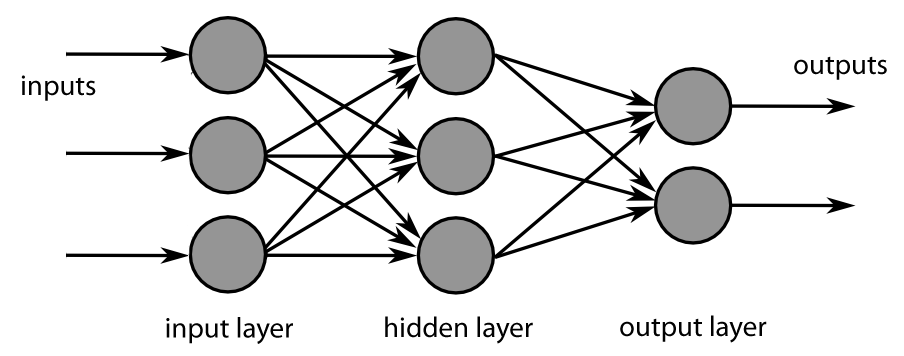

In [1]:
# This image was taken from: http://web.utk.edu/~wfeng1/spark/fnn.html"
from IPython.display import Image
Image ("fnn.png")

Term 2: Compress the data. These neural networks have the ability to represented higher dimensional data in much lesser dimensions. Wait, isnt that what PCA/ t-SNE/ other dimensionality redcution algorithms are for? Yes, an Auto Encoder can be used for dimensionality reduction and is much more effective than the above mentioned techniques.

Can I use an auto encoder in place of JPEG/ ZIP/ other compression techniques?
No, Auto Encoders are not generic compression algorithms. It can only compress/ reconstruct the data on which it has been trained. 

The part of extracting smaller number of features from a large number of features is known as encoding. 

Term 3: Reconstruct the data. Extracting the data from its compressed state. This part is known as decoding. Important Note: reconstruction is 'lossy'.

Below is the architecture of an auto encoder.

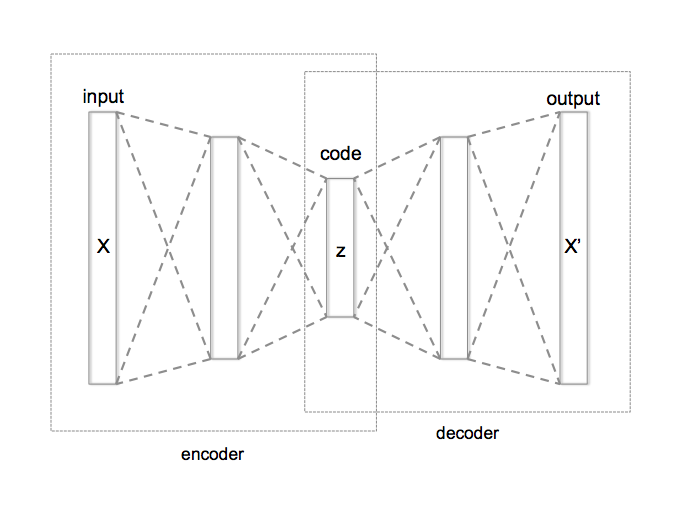

In [2]:
# this image has been taken from https://en.wikipedia.org/wiki/Autoencoder#/media/File:Autoencoder_structure.png
Image ("autoencoder.png")

##### Symmetrical ! 

Yes, most of the auto encoder architectures you might come across will be symmetrical (This is not a rule! You can play with them as you wish). What is of extreme importance is 'z'/ 'code'. This is the compressed (encoded) state of data. How it gets compressed is intuitive. As we can see from the figure, we keep reducing the number of neurons in each layer. The below picture should give you a better clairty on the architecture

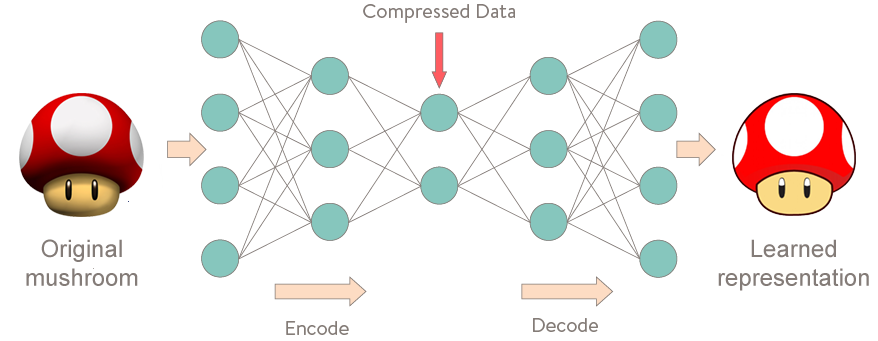

In [3]:
# this image has been taken from http://curiousily.com/data-science/2017/02/02/what-to-do-when-data-is-missing-part-2.html
Image ('autoencoder2.png')

#### 2. How will we train it ? 

The trick is to use the input as the output! @.@

When designing an auto encoder we do not need labelled output (remember this is unsupervised learning, err! self-supervised learning)

Let us say the input is X.

Compressed Data = f (X) -> f is some complex function

Ouput (ideally, also X) = g (Compressed Data) -> g here is f-inverse

So, what we are doing with an auto encoder is 'f-inverse (f (X))'

Though it may seem simple in theory, the problem lies in the fact that we always have a lossy reconstruction. We do not usually get X in the output. We get X', an appropriation of X. This approximation is used to calculate the loss. This loss is also known as 'reconstruction loss'. The squared difference between input and output is used as the loss which in turn is used by back-propagation to learn the parameters. Note: I have seen a few projects use 'RMSE' as their loss functions.

### Code ! Finally !

I understand coding is much more fun than theory. Let us code a simple auto encoder first and then get back to learning more about auto encoders. In this example let us train our model to reduce the dimensionality of MNIST data from 784 to 2. And let us try to reconstruct the data back to 784 dimensions.

In [4]:
# library section
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam

C:\Users\abhil\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data ()

In [6]:
print (xTrain.shape)
print (yTrain.shape)
print (xTest.shape)
print (yTest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
# we need to convert an image to a 1D array
xTrain [0].reshape (784)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [8]:
xTrain = xTrain.reshape (60000, 784)
xTest = xTest.reshape (10000, 784)

In [9]:
# the best way to normalize images is by diving each pixel value by 255 (highest value a pixel can take)
# this will leave each value between 0 and 1
xTrain = xTrain/ 255
xTest = xTest/ 255

In [10]:
autoencoder = Sequential ()
autoencoder.add (Dense (500,  activation = 'relu', input_shape = (784, )))
autoencoder.add (Dense (300,  activation = 'relu'))
autoencoder.add (Dense (300,  activation = 'relu'))
autoencoder.add (Dense (300,  activation = 'relu'))
autoencoder.add (Dense (300,  activation = 'relu'))
autoencoder.add (Dense (100,  activation = 'relu'))
autoencoder.add (Dense (50,  activation = 'linear', name = 'code'))
autoencoder.add (Dense (100,  activation = 'relu'))
autoencoder.add (Dense (300,  activation = 'relu'))
autoencoder.add (Dense (300,  activation = 'relu'))
autoencoder.add (Dense (300,  activation = 'relu'))
autoencoder.add (Dense (300,  activation = 'relu'))
autoencoder.add (Dense (500,  activation = 'relu'))
autoencoder.add (Dense (784,  activation = 'sigmoid'))

In [11]:
autoencoder.compile (loss = 'mean_squared_error', optimizer = Adam ())
history = autoencoder.fit (xTrain, xTrain, batch_size=128, epochs=50, verbose=1, 
                validation_data = (xTest, xTest))

encoder = Model (autoencoder.input, autoencoder.get_layer ('code').output)
Zenc = encoder.predict(xTrain)  # bottleneck representation

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 22s 360us/step - loss: 0.0584 - val_loss: 0.0420
Epoch 2/50
60000/60000 [==============================] - 21s 346us/step - loss: 0.0344 - val_loss: 0.0295
Epoch 3/50
60000/60000 [==============================] - 21s 343us/step - loss: 0.0282 - val_loss: 0.0265
Epoch 4/50
60000/60000 [==============================] - 20s 341us/step - loss: 0.0254 - val_loss: 0.0239
Epoch 5/50
60000/60000 [==============================] - 20s 341us/step - loss: 0.0231 - val_loss: 0.0223
Epoch 6/50
60000/60000 [==============================] - 21s 342us/step - loss: 0.0213 - val_loss: 0.0206
Epoch 7/50
60000/60000 [==============================] - 21s 349us/step - loss: 0.0198 - val_loss: 0.0191
Epoch 8/50
60000/60000 [==============================] - 21s 342us/step - loss: 0.0186 - val_loss: 0.0183
Epoch 9/50
60000/60000 [==============================] - 21s 347us/step - loss: 0.0176 - val_

In [12]:
Renc = autoencoder.predict(xTrain)        # reconstruction

[]

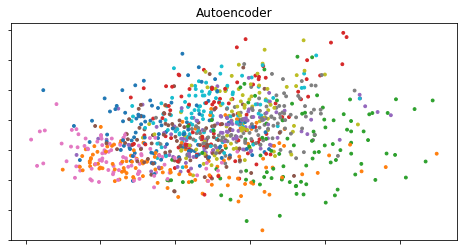

In [18]:
plt.figure(figsize=(8,4))
plt.title('Autoencoder')
plt.scatter(Zenc[:1000,0], Zenc[:1000,1], c=yTrain[:1000], s=8, cmap='tab10')
plt.gca().get_xaxis().set_ticklabels([])
plt.gca().get_yaxis().set_ticklabels([])

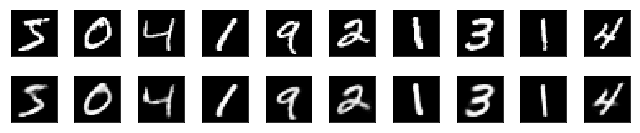

In [14]:
plt.figure(figsize=(9,2))
toPlot = (xTrain, Renc)
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()

In [19]:
Zenc.shape

(60000, 50)

In [20]:
Zenc [0]

array([ 1.1056294 ,  2.7143013 ,  4.906567  ,  1.1484971 , -2.0364122 ,
        1.947908  ,  1.1961741 , -1.3002095 ,  1.0030612 ,  1.5619688 ,
       -0.94516134,  3.4214044 , -2.017827  ,  0.6300803 , -1.7953421 ,
       -1.0884584 , -3.371485  ,  0.83485174, -1.0251418 , -1.8310995 ,
       -4.5227413 , -2.1588356 ,  2.2100503 , -0.38789207, -1.430206  ,
       -1.5093012 , -1.1918899 , -0.78447145, -5.6554155 , -2.7604568 ,
       -2.8957546 ,  0.652206  ,  4.110507  ,  1.1771977 , -0.2968188 ,
        4.257336  , -6.5768256 ,  2.3724406 ,  6.1284213 ,  0.2887235 ,
       -0.6637287 , -1.1904087 , -2.8707142 ,  5.0711074 , -1.021178  ,
        1.7862756 , -9.2577305 , -2.8878736 , -0.43511418, -0.1694399 ],
      dtype=float32)

In [21]:
print (history.history.keys ())

dict_keys(['val_loss', 'loss'])


In [23]:
print (type (history.history))

<class 'dict'>


In [24]:
print (history.history ['loss'])

[0.05844182774821917, 0.03439853052397569, 0.028171376670400303, 0.025411858160297077, 0.023064768736561138, 0.021283139708638193, 0.01981679318845272, 0.018556620046496393, 0.017602177635828654, 0.016782331121464572, 0.01609407763381799, 0.01564387347449859, 0.015285266984502475, 0.014895895526806513, 0.014564577058454355, 0.01420556588570277, 0.013852484061817327, 0.013499477932353815, 0.013194669043521087, 0.012937275629738967, 0.01272814033081134, 0.012536119787395, 0.01233933755606413, 0.01211120339880387, 0.011913817250231901, 0.011772621987263362, 0.011663606902460258, 0.01142869981576999, 0.011342744274934133, 0.011125179882347585, 0.01102523719072342, 0.010975773086150487, 0.010800346527000269, 0.01070534544835488, 0.010555340334276358, 0.010511600199838479, 0.010436069345970949, 0.01035584327330192, 0.010196289425591627, 0.010136018520096938, 0.010106189274787902, 0.010008885772526264, 0.009919653296470642, 0.009912772925198078, 0.009812509324153264, 0.009779359736045202, 0.0

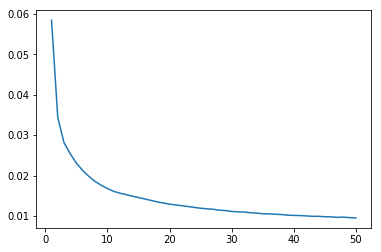

In [28]:
plt.plot (range (1, 51) , history.history ['loss'])

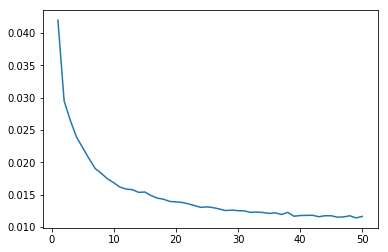

In [30]:
plt.plot (range (1, 51) , history.history ['val_loss'])

In [32]:
codeWeights = autoencoder.get_layer ('code').get_weights ()

In [35]:
len (codeWeights [0])

100